In [2]:
pip install matplotlib

     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.5 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.7/8.0 MB 13.7 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/8.0 MB 17.4 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/8.0 MB 18.4 MB/s eta 0:00:01
   ----------------- ---------------------- 3.5/8.0 MB 20.1 MB/s eta 0:00:01
   ----------------------- ---------------- 4.6/8.0 MB 19.6 MB/s eta 0:00:01
   ---------------------------- ----------- 5.6/8.0 MB 21.2 MB/s eta 0:00:01
   ---------------------------------- ----- 6.9/8.0 MB 21.1 MB/s eta 0:00:01
   ---------------------------------------  8.0/8.0 MB 22.2 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 19.6 MB/s eta 0:00:00
   --


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [61]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [9]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [10]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [11]:
len(dataset)

68

In [48]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])
    print(image_batch[0].numpy().astype("uint8"))
    print(image_batch[0].shape)
    print(label_batch.numpy())

tf.Tensor(
[[[116. 114. 127.]
  [108. 106. 119.]
  [108. 106. 119.]
  ...
  [136. 138. 151.]
  [139. 141. 154.]
  [141. 143. 156.]]

 [[100.  98. 111.]
  [102. 100. 113.]
  [ 98.  96. 109.]
  ...
  [141. 143. 156.]
  [142. 144. 157.]
  [142. 144. 157.]]

 [[105. 103. 116.]
  [ 96.  94. 107.]
  [111. 109. 122.]
  ...
  [143. 145. 158.]
  [140. 142. 155.]
  [138. 140. 153.]]

 ...

 [[143. 145. 158.]
  [144. 146. 159.]
  [153. 155. 168.]
  ...
  [179. 183. 195.]
  [179. 183. 195.]
  [178. 182. 194.]]

 [[134. 136. 149.]
  [134. 136. 149.]
  [138. 140. 153.]
  ...
  [182. 186. 198.]
  [179. 183. 195.]
  [175. 179. 191.]]

 [[137. 139. 152.]
  [135. 137. 150.]
  [133. 135. 148.]
  ...
  [189. 193. 205.]
  [187. 191. 203.]
  [183. 187. 199.]]], shape=(256, 256, 3), dtype=float32)
[[[116 114 127]
  [108 106 119]
  [108 106 119]
  ...
  [136 138 151]
  [139 141 154]
  [141 143 156]]

 [[100  98 111]
  [102 100 113]
  [ 98  96 109]
  ...
  [141 143 156]
  [142 144 157]
  [142 144 157]]

 [[105

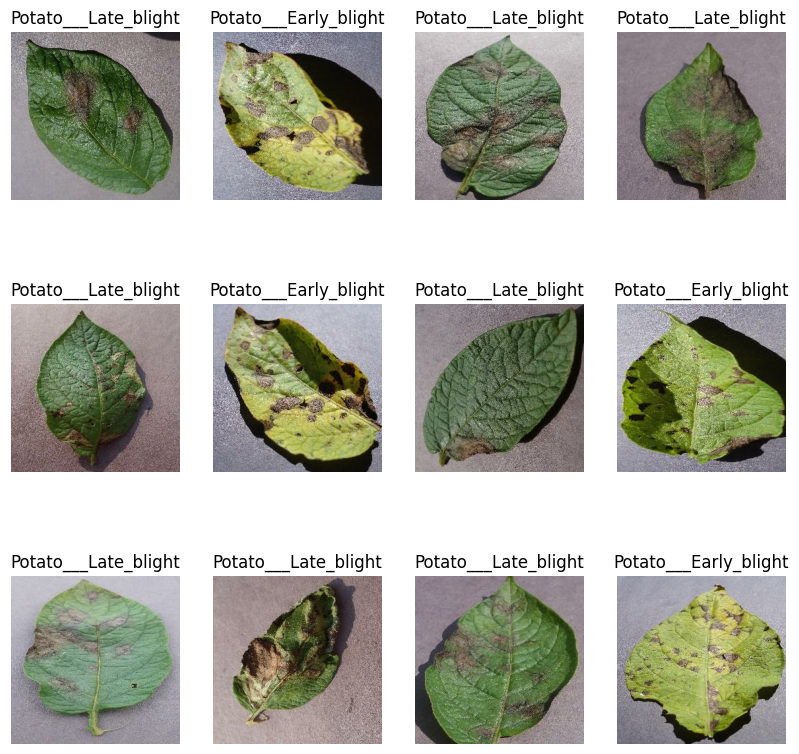

In [20]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
80%==>TRAINING
20%==>10% VALIDATION,10% TEST

In [23]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [24]:
train_ds=dataset.take(54)
len(train_ds)

54

In [25]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [26]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [27]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [28]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [29]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds);

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [30]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [31]:
len(train_ds)

54

In [32]:
len(val_ds)

6

In [33]:
len(test_ds)

8

In [34]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [36]:
pip install --upgrade tensorflow



   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.1 MB 1.3 MB/s eta 0:04:55
   ---------------------------------------- 0.6/377.1 MB 8.9 MB/s eta 0:00:43
   ---------------------------------------- 1.5/377.1 MB 13.7 MB/s eta 0:00:28
   ---------------------------------------- 2.7/377.1 MB 17.5 MB/s eta 0:00:22
   ---------------------------------------- 4.3/377.1 MB 21.2 MB/s eta 0:00:18
    --------------------------------------- 6.0/377.1 MB 24.0 MB/s eta 0:00:16
    --------------------------------------- 7.6/377.1 MB 25.7 MB/s eta 0:00:15
   - -------------------------------------- 9.6/377.1 MB 27.9 MB/s eta 0:00:14
   - -------------------------------------- 11.9/377.1 MB 38.5 MB/s eta 0:00:10
   - -------------------------------------- 13.9/377.1 MB 40.9 MB/s eta 0:00:09
   - -------------------------------------- 15.9/377.1 MB 46.7 MB/s eta 0:00:08
   - -------------------------------------- 16.3/377.1 MB 

  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [54]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [57]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [58]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [62]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8965 - loss: 0.2693 - val_accuracy: 0.8281 - val_loss: 0.5975
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9501 - loss: 0.1381 - val_accuracy: 0.9583 - val_loss: 0.1039
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9742 - loss: 0.0647 - val_accuracy: 0.9792 - val_loss: 0.0598
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9763 - loss: 0.0587 - val_accuracy: 0.9062 - val_loss: 0.2720
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9810 - loss: 0.0522 - val_accuracy: 0.9375 - val_loss: 0.1678
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9746 - loss: 0.0666 - val_accuracy: 0.9115 - val_loss: 0.2671
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9717 - loss: 0.0675 - val_accuracy: 0.9479 - val_loss: 0.1577
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9812 - loss: 0.0659 - val_accuracy: 0.9375 - val_loss:

In [63]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.9555 - loss: 0.1291


In [64]:
scores

[0.1322038620710373, 0.953125]

In [65]:
history

In [66]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [67]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [69]:
history.history['accuracy']

[0.9346064925193787,
 0.9641203880310059,
 0.9745370149612427,
 0.9780092835426331,
 0.9814814925193787,
 0.9803240895271301,
 0.9704861044883728,
 0.9791666865348816,
 0.9814814925193787,
 0.9751157164573669]

In [70]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']


Text(0.5, 1.0, 'Training and Validation Loss')

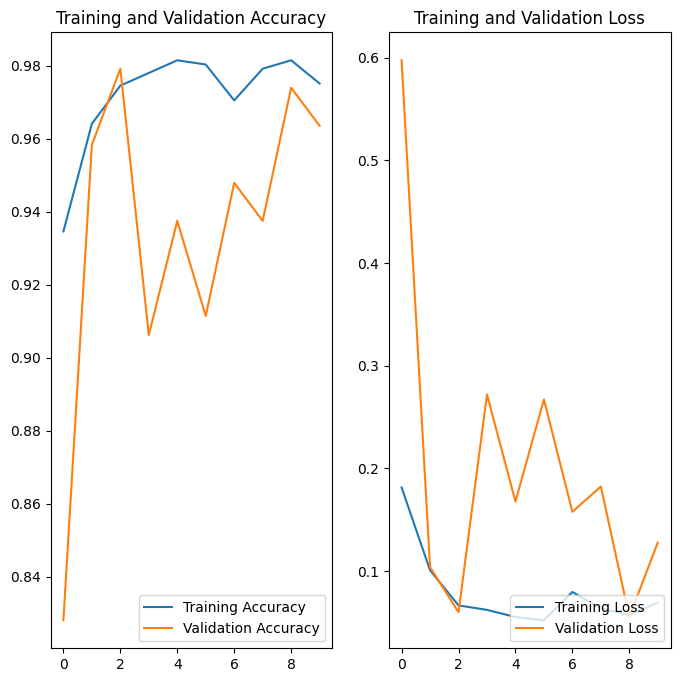

In [72]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')